# Incidence du syndrome de la varicelle


In [1]:
## import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os.path
from urllib.request import urlretrieve

Les données de l'incidence du syndrome de la varicelle sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.


In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"   
data_local = "inc-7-PAY.csv"
if not os.path.isfile(data_local):
    urlretrieve(data_url, data_local)

In [3]:
raw_data = pd.read_csv(data_local, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202425          7  12129     8130   16128      18          12   
1     202424          7  12731     9438   16024      19          14   
2     202423          7  14657    11339   17975      22          17   
3     202422          7  11628     8361   14895      17          12   
4     202421          7   9701     6851   12551      15          11   
5     202420          7  13661    10209   17113      20          15   
6     202419          7  10083     6413   13753      15           9   
7     202418          7  13438     9514   17362      20          14   
8     202417          7  15303    11219   19387      23          17   
9     202416          7  18138    13540   22736      27          20   
10    202415          7  24929    17315   32543      37          26   
11    202414          7  16181    12544   19818      24          19   
12    202413          7  18322    14206   22438      27          21   
13    202412          7  12818     9128   16508      19          13   
14    202411          7  15973    12400   19546      24          19   
15    202410          7  14301    10761   17841      21          16   
16    202409          7  14337    10871   17803      21          16   
17    202408          7  15899    11991   19807      24          18   
18    202407          7  11294     8226   14362      17          12   
19    202406          7  12174     9020   15328      18          13   
20    202405          7   8814     6110   11518      13           9   
21    202404          7   9504     6566   12442      14          10   
22    202403          7   6948     4633    9263      10           7   
23    202402          7   7125     4852    9398      11           8   
24    202401          7  13305     9214   17396      20          14   
25    202352          7  11636     7354   15918      18          12   
26    202351          7   6912     4227    9597      10           6   
27    202350          7   8799     6215   11383      13           9   
28    202349          7   7817     5362   10272      12           8   
29    202348          7   7351     4749    9953      11           7   
...      ...        ...    ...      ...     ...     ...         ...   
1721  199126          7  17608    11304   23912      31          20   
1722  199125          7  16169    10700   21638      28          18   
1723  199124          7  16171    10071   22271      28          17   
1724  199123          7  11947     7671   16223      21          13   
1725  199122          7  15452     9953   20951      27          17   
1726  199121          7  14903     8975   20831      26          16   
1727  199120          7  19053    12742   25364      34          23   
1728  199119          7  16739    11246   22232      29          19   
1729  199118          7  21385    13882   28888      38          25   
1730  199117          7  13462     8877   18047      24          16   
1731  199116          7  14857    10068   19646      26          18   
1732  199115          7  13975     9781   18169      25          18   
1733  199114          7  12265     7684   16846      22          14   
1734  199113          7   9567     6041   13093      17          11   
1735  199112          7  10864     7331   14397      19          13   
1736  199111          7  15574    11184   19964      27          19   
1737  199110          7  16643    11372   21914      29          20   
1738  199109          7  13741     8780   18702      24          15   
1739  199108          7  13289     8813   17765      23          15   
1740  199107          7  12337     8077   16597      22          15   
1741  199106          7  10877     7013   14741      19          12   
1742  199105          7  10442     6544   14340      18          11   
1743  199104          7   7913     4563   11263      14           8   
1744  199103          7  15387    10484   20290      27          18   
1745  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? - NON

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

nous écrivons une petite fonction Python pour convertir les semaines encodees par le reseau sentinelles en format comprehensif pour pandas. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [5]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

In [6]:
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202425          7  12129     8130   16128      18          12   
1     202424          7  12731     9438   16024      19          14   
2     202423          7  14657    11339   17975      22          17   
3     202422          7  11628     8361   14895      17          12   
4     202421          7   9701     6851   12551      15          11   
5     202420          7  13661    10209   17113      20          15   
6     202419          7  10083     6413   13753      15           9   
7     202418          7  13438     9514   17362      20          14   
8     202417          7  15303    11219   19387      23          17   
9     202416          7  18138    13540   22736      27          20   
10    202415          7  24929    17315   32543      37          26   
11    202414          7  16181    12544   19818      24          19   
12    202413          7  18322    14206   22438      27          21   
13    202412          7  12818     9128   16508      19          13   
14    202411          7  15973    12400   19546      24          19   
15    202410          7  14301    10761   17841      21          16   
16    202409          7  14337    10871   17803      21          16   
17    202408          7  15899    11991   19807      24          18   
18    202407          7  11294     8226   14362      17          12   
19    202406          7  12174     9020   15328      18          13   
20    202405          7   8814     6110   11518      13           9   
21    202404          7   9504     6566   12442      14          10   
22    202403          7   6948     4633    9263      10           7   
23    202402          7   7125     4852    9398      11           8   
24    202401          7  13305     9214   17396      20          14   
25    202352          7  11636     7354   15918      18          12   
26    202351          7   6912     4227    9597      10           6   
27    202350          7   8799     6215   11383      13           9   
28    202349          7   7817     5362   10272      12           8   
29    202348          7   7351     4749    9953      11           7   
...      ...        ...    ...      ...     ...     ...         ...   
1721  199126          7  17608    11304   23912      31          20   
1722  199125          7  16169    10700   21638      28          18   
1723  199124          7  16171    10071   22271      28          17   
1724  199123          7  11947     7671   16223      21          13   
1725  199122          7  15452     9953   20951      27          17   
1726  199121          7  14903     8975   20831      26          16   
1727  199120          7  19053    12742   25364      34          23   
1728  199119          7  16739    11246   22232      29          19   
1729  199118          7  21385    13882   28888      38          25   
1730  199117          7  13462     8877   18047      24          16   
1731  199116          7  14857    10068   19646      26          18   
1732  199115          7  13975     9781   18169      25          18   
1733  199114          7  12265     7684   16846      22          14   
1734  199113          7   9567     6041   13093      17          11   
1735  199112          7  10864     7331   14397      19          13   
1736  199111          7  15574    11184   19964      27          19   
1737  199110          7  16643    11372   21914      29          20   
1738  199109          7  13741     8780   18702      24          15   
1739  199108          7  13289     8813   17765      23          15   
1740  199107          7  12337     8077   16597      22          15   
1741  199106          7  10877     7013   14741      19          12   
1742  199105          7  10442     6544   14340      18          11   
1743  199104          7   7913     4563   11263      14           8   
1744  199103          7  15387    10484   20290      27          18   
1745  199102          7  16277  

nous trions les points par période, dans le sens chronologique.

In [10]:
sorted_data = raw_data.set_index('period').sort_index()
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2023-11-27/2023-12-03  202348          7   7351     4749    9953      11   
2023-12-04/2023-12-10  202349          7   7817     5362   10272      12   
2023-12-11/2023-12-17  202350          7   8799     6215   11383      13   
2023-12-18/2023-12-24  202351          7   6912     4227    9597      10   
2023-12-25/2023-12-31  202352          7  11636     7354   15918      18   
2024-01-01/2024-01-07  202401          7  13305     9214   17396      20   
2024-01-08/2024-01-14  202402          7   7125     4852    9398      11   
2024-01-15/2024-01-21  202403          7   6948     4633    9263      10   
2024-01-22/2024-01-28  202404          7   9504     6566   12442      14   
2024-01-29/2024-02-04  202405          7   8814     6110   11518      13   
2024-02-05/2024-02-11  202406          7  12174     9020   15328      18   
2024-02-12/2024-02-18  202407          7  11294     8226   14362      17   
2024-02-19/2024-02-25  202408          7  15899    11991   19807      24   
2024-02-26/2024-03-03  202409          7  14337    10871   17803      21   
2024-03-04/2024-03-10  202410          7  14301    10761   17841      21   
2024-03-11/2024-03-17  202411          7  15973    12400   19546      24   
2024-03-18/2024-03-24  202412          7  12818     9128   16508      19   
2024-03-25/2024-03-31  202413          7  18322    14206   22438      27   
2024-04-01/2024-04-07  202414          7  16181    12544   19818      24   
2024-04-08/2024-04-14  202415          7  24929    17315   32543      37 

Nous vérifions la cohérence des données.

In [13]:
periods = sorted_data.index
periods


PeriodIndex(['1990-12-03/1990-12-09', '1990-12-10/1990-12-16',
             '1990-12-17/1990-12-23', '1990-12-24/1990-12-30',
             '1990-12-31/1991-01-06', '1991-01-07/1991-01-13',
             '1991-01-14/1991-01-20', '1991-01-21/1991-01-27',
             '1991-01-28/1991-02-03', '1991-02-04/1991-02-10',
             ...
             '2024-04-15/2024-04-21', '2024-04-22/2024-04-28',
             '2024-04-29/2024-05-05', '2024-05-06/2024-05-12',
             '2024-05-13/2024-05-19', '2024-05-20/2024-05-26',
             '2024-05-27/2024-06-02', '2024-06-03/2024-06-09',
             '2024-06-10/2024-06-16', '2024-06-17/2024-06-23'],
            dtype='period[W-SUN]', name='period', length=1751, freq='W-SUN')

In [14]:
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Aucune periode non adjacente a la precedente - pas de donnees manquantes

Donc on plot les data pour une 1ere vision puis zoom

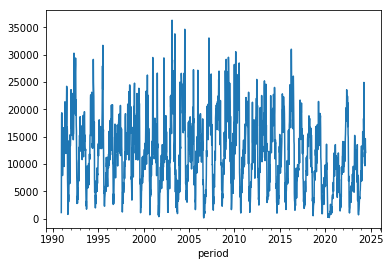

In [16]:
sorted_data['inc'].plot()

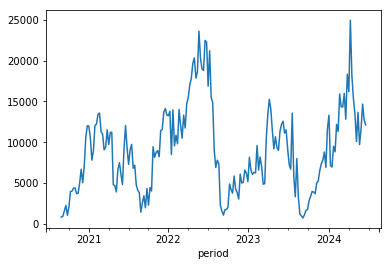

In [17]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle


On regarde l'incidence annuelle en commencant l'annee par la semaine contenant le 1er septembre - depuis 1991


In [18]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

 Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

In [19]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

incidence annuelle

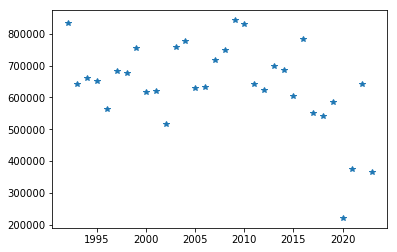

In [20]:
yearly_incidence.plot(style='*')

In [21]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64